In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# import data

In [213]:
df = pd.read_excel('cleaned_data.xlsx', index_col=0)
df = df.dropna()

## EDA

In [192]:
# Check target variable
fig = px.histogram(df, x="iat", nbins=100,
                   title = "IAT: target variable distribution",
                   labels = {"iat": "IAT score"},
                   log_y=False,
                   color_discrete_sequence=['indianred'])
fig.show()



In [235]:
print(df.describe().T)

                                      count         mean        std  \
y_birth                              8445.0  1991.334044  12.737542   
iat                                  8445.0     0.082566   0.500710   
edu                                  8445.0     6.160450   2.499777   
liberal                              8445.0     5.041445   1.613373   
religious                            8445.0     1.929781   0.947419   
gender_feel                          8445.0     7.414802   1.626275   
prefer_straight                      8445.0     4.054825   1.223759   
transgender                          8445.0     0.000000   0.000000   
race_East Asian                      8445.0     0.036945   0.188638   
race_Multiracial                     8445.0     0.046181   0.209890   
race_Other or unknown                8445.0     0.067377   0.250689   
race_South Asian                     8445.0     0.029840   0.170156   
race_White                           8445.0     0.701954   0.457427   
fam. m

In [193]:
numerical = ['iat', 'y_birth', 'edu', 'prefer_straight', 'liberal', 'religious', 'gender_feel']

correlation = df[numerical]
correlation = correlation.corr().abs()

#sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

for i in range(0, len(numerical)):
    correlation.iloc[i, i:] = 0

fig = px.imshow(correlation, text_auto=False, color_continuous_scale='BuGn')
fig.update_layout(height=600, width=600, title_text="CORRELATION MATRIX")
fig.show()
## DATA EXPLORATION WITH OLS REGRESSION


In [194]:
## Explore the relationship between IAT and other variables

In [195]:
#### No linear relationship between IAT and the following variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'YEARS OF EDUCATION')

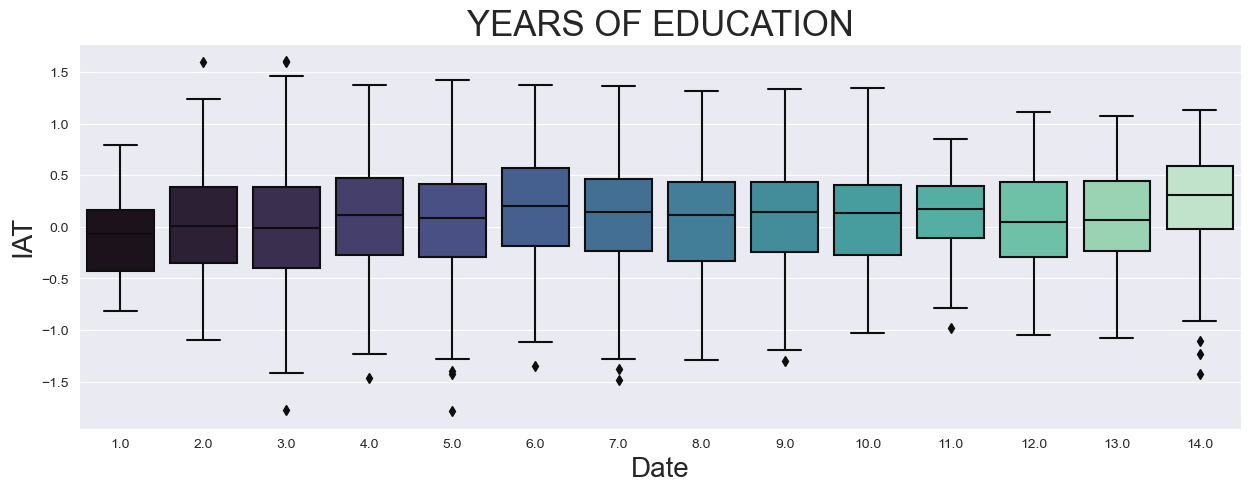

In [196]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='edu', y='iat', palette="mako")
plt.xlabel('Date', fontsize=20)
plt.ylabel('IAT', fontsize=20)
ax.legend().set_visible(False)
plt.title("YEARS OF EDUCATION", fontsize=25)

In [197]:
#### There is linear relationship between IAT and the following variables

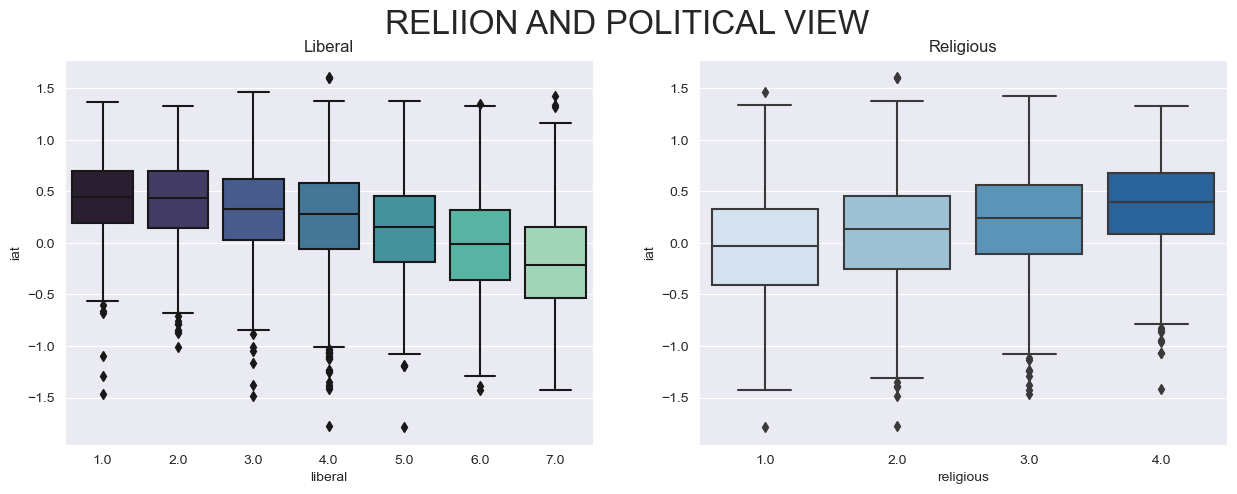

In [198]:
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.boxplot(x='liberal', y='iat', data=df, ax=ax1, palette="mako")
ax1.set_title("Liberal")

sns.boxplot(x='religious', y='iat', data=df, ax=ax2, palette="Blues")
ax2.set_title("Religious")

plt.suptitle("RELIION AND POLITICAL VIEW", fontsize=24)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


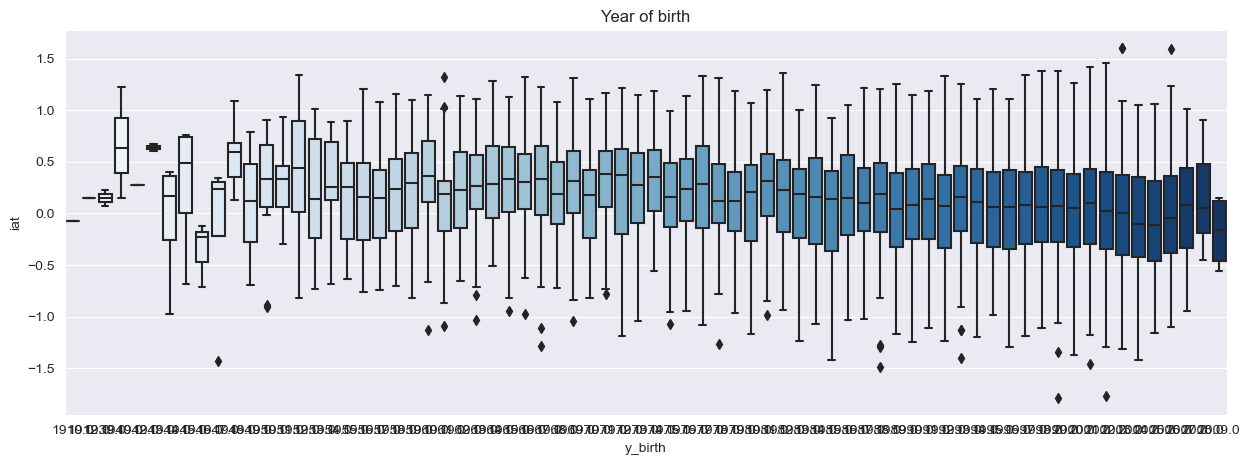

In [199]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x='y_birth', y='iat', data=df, ax=ax, palette="Blues")
ax.set_title("Year of birth")
ax.legend().set_visible(False)
# negative relationship with age+

## OLS REGRESSION

In [214]:
## define functions
def LinearRegression(y, x):
    x = sm.add_constant(x)
    ols = sm.OLS(y, x).fit()
    ols_table = ols.summary()
    return ols_table

def TableResults(ols_table, labels):
    """Create a table with the results of the OLS regression
    ols_table: the output of the LinearRegression function
    labels: the labels of the variables
    """
    ## format the ols table
    table = pd.DataFrame(ols_table.tables[1])
    list_col = ['ind_var', 'coef', 'std_err', 't_val', 'p_val', 'low_ci', 'high_ci']
    for num in range(0,len(table.columns)):
        table.rename(columns={table.columns[num]: f"{list_col[num]}" }, inplace = True)
    table = table.iloc[2:,:]
    #ols = sm.OLS(y, x).fit()
    #table['obs'] = ols.nobs
    table.rename(columns={"P>|t|": "p_val", "[0.025": "low_ci", "0.975]": "high_ci"}, inplace=True)
    table = table.set_index(table.columns[0])
    table = round(table, 3)
    table_results = table.applymap(str).applymap(float)
    table_results.index = labels
    return table_results

In [230]:
import matplotlib.pyplot as plt

def Plot_ols_coefficients_and_CI(table):
    """Plot the OLS results with the 95% confidence intervals"""
    ## prepare the data
    n_coeff = len(table.index)
    print(table.index)
    table = table.iloc[0:n_coeff, :]
    lower = table['low_ci']
    upper = table['high_ci']
    table['variables'] = table.index.values
    n = len(table)
    l = range(0, n)
    labels = [0] * n
    names = table['variables']

    ##plot
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot((lower,upper), (l, l), 'ro-', color='blue', linewidth=2, markersize=2)
    plt.scatter(x=table.coef, y=range(0,len(table)))
    ax.tick_params(axis='both', which='both')
    plt.yticks(range(0, n), names)
    plt.plot(labels, l, '--', color='red', linewidth=2, markersize=2)
    ax.set_ylabel('Coefficients', fontsize=10)
    plt.scatter(lower-.002, l, marker='|', color='blue')
    plt.scatter(upper+.002, l, marker='|', color='blue')
    ax.set_facecolor('white')
    plt.title('CORRELATION WITH IMPLICIT SEXUAL DISCRIMINATION \nOLS coefficients - 95% Confidence Intervals', fontsize=15)
    #plt.savefig("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/MidTermProject/results/coefplot.jpeg", bbox_inches='tight')

def plot_coefficient_bars(table_results):
    bars = table_results['coef']
    bars = pd.DataFrame(bars)
    bars['value'] = np.where(bars['coef']>0, 1, 0)
    bars['coef'] = abs(bars['coef'])
    bars = bars.sort_values(by="coef")
    bars['colors'] = np.where(bars['value']==0, "green", "red")

    fig = plt.figure(figsize = (10, 5))
    plt.barh(bars.index, bars['coef'], color=bars['colors'])
    plt.xlabel("Value")
    # y-axis label
    plt.ylabel("Coefficients")
    # Title of the figure
    plt.title("Ols coefficients: Predictors of implicit sexual discrimination")
    plt.legend(['Negative predictors', 'Positive predicgors'], loc='lower right')
    plt.show()

In [219]:
df.columns

Index(['y_birth', 'iat', 'edu', 'liberal', 'religious', 'gender_feel',
       'prefer_straight', 'transgender', 'race_East Asian', 'race_Multiracial',
       'race_Other or unknown', 'race_South Asian', 'race_White',
       'fam. member_yes', 'friend_yes', 'straight_first_Straight right first',
       'straight_Queer', 'straight_Yes', 'birthsex_Male', 'friendly_yes',
       'met gay_yes', 'adoption_Pro/neutral', 'marriage_Pro/neutral',
       'relation_Pro/neutral', 'work_Pro/neutral'],
      dtype='object')

In [222]:
names = ['Year of birth', 'Years of education', 'Politics: liberal', 'Religiuos', 'Positive towards gay', 'Prefer straight people', 'Transgender', 'Ethnic group: East asian', 'Ethnic group: Multi', 'Ethnic group: Other', 'Ethnic group: South Asian', 'Ethnic group: White', 'Has gay fam. member', 'Has gay friend', 'Input: straight first', 'Queer', 'Straight', 'Male (birth sex)', 'Gay friendly', 'Has met gay person', 'Neutral/pro Adoption', 'Neutral/pro gay marriage', 'Neutral/pro gay relationships', 'Neutral/pro gay at workplace']
len(names)

24

In [223]:
## apply ols regression
y = np.array(df['iat'])
x = df.drop(['iat'], axis = 1)
x = np.array(x)
x = np.array(df.drop(['iat'], axis = 1))
ols = sm.OLS(y, x).fit()
ols_table = LinearRegression(y, x)
table_results = TableResults(ols_table, names)
table_results

,coef,std_err,t_val,p_val,low_ci,high_ci
Year of birth,-4.100000e-03,0.000000e+00,-9.095,0.000,-5.000000e-03,-3.000000e-03
Years of education,-2.800000e-03,2.000000e-03,-1.221,0.222,-7.000000e-03,2.000000e-03
Politics: liberal,-4.170000e-02,3.000000e-03,-12.179,0.000,-4.800000e-02,-3.500000e-02
Religiuos,2.180000e-02,5.000000e-03,4.074,0.000,1.100000e-02,3.200000e-02
Positive towards gay,-2.800000e-03,3.000000e-03,-0.992,0.321,-8.000000e-03,3.000000e-03
Prefer straight people,8.820000e-02,5.000000e-03,17.980,0.000,7.900000e-02,9.800000e-02
Transgender,8.093000e-16,1.050000e-16,7.706,0.000,6.030000e-16,1.020000e-15
Ethnic group: East asian,-4.080000e-02,2.700000e-02,-1.509,0.131,-9.400000e-02,1.200000e-02
Ethnic group: Multi,-5.790000e-02,2.500000e-02,-2.349,0.019,-1.060000e-01,-1.000000e-02
Ethnic group: Other,-6.130000e-02,2.200000e-02,-2.830,0.005,-1.040000e-01,-1.900000e-02


Index(['Year of birth', 'Years of education', 'Politics: liberal', 'Religiuos',
       'Positive towards gay', 'Prefer straight people', 'Transgender',
       'Ethnic group: East asian', 'Ethnic group: Multi',
       'Ethnic group: Other', 'Ethnic group: South Asian',
       'Ethnic group: White', 'Has gay fam. member', 'Has gay friend',
       'Input: straight first', 'Queer', 'Straight', 'Male (birth sex)',
       'Gay friendly', 'Has met gay person', 'Neutral/pro Adoption',
       'Neutral/pro gay marriage', 'Neutral/pro gay relationships',
       'Neutral/pro gay at workplace'],
      dtype='object')


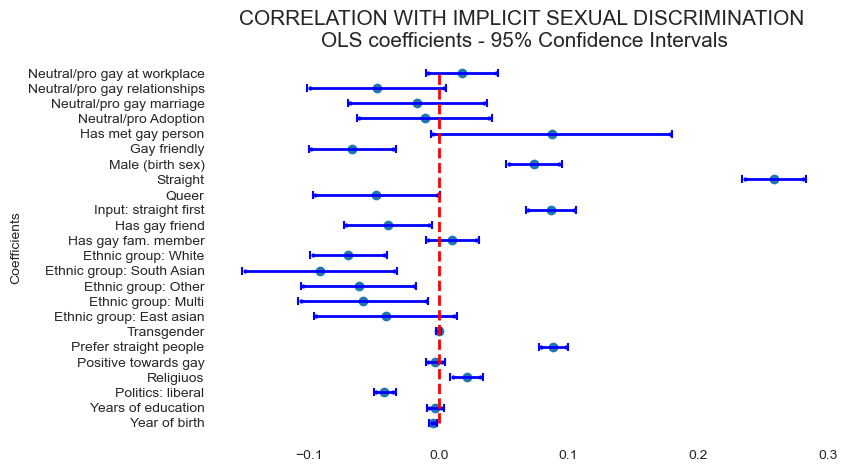

In [227]:
Plot_ols_coefficients_and_CI(table_results)

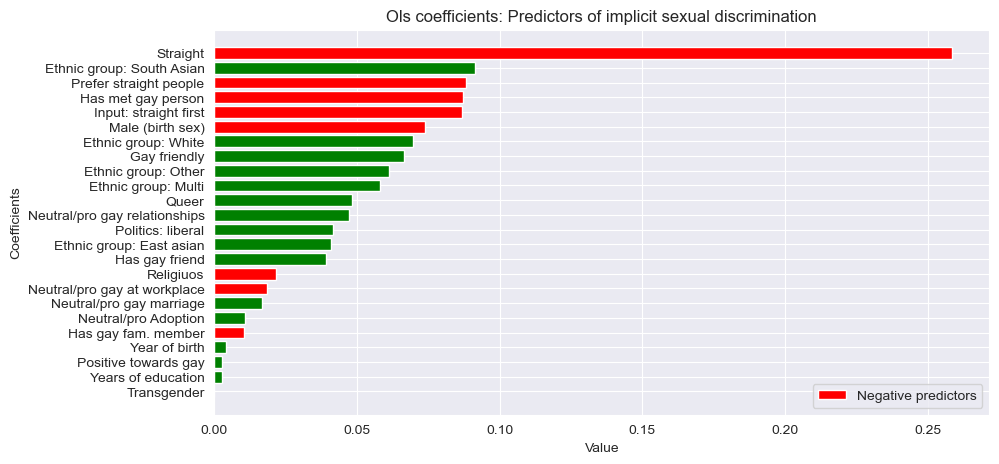

In [231]:
plot_coefficient_bars(table_results)

20